# Exercício 2

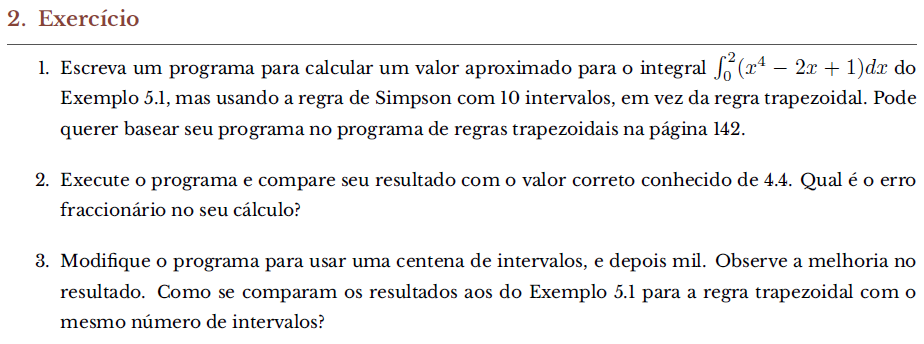

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

## Alínea 1

In [3]:
# Regra do trapézio para n passos
def trapezio(start: float, end: float, func: Callable, n: float):
    # Abcissas
    h = (end - start) / n
    tt = np.linspace(start, end, n + 1)
    vv = func(tt)

    # Área dos trapézios
    aa = vv[:-1] + vv[1:]
    integral = aa.cumsum()

    return h * integral / 2


# Regra de Simpson para 2n passos
def simpson(start: float, end: float, func: Callable, n: float):
    # Abcissas
    h = (end - start) / (2 * n)
    tt = np.linspace(start, end, 2 * n + 1)
    vv = func(tt)

    # Área segmentos
    aa = vv[:-2:2] + 4 * vv[1:-1:2] + vv[2: :2]
    integral = aa.cumsum()

    return h * (integral) / 3


# Função a integrar
def f(x: float) -> float:
    return x**4 - 2 * x + 1


start = 0
end = 2
n = 10

intt = trapezio(start, end, f, n)[-1]
ints = simpson(start, end, f, n//2)[-1]

print(intt)
print(ints)

4.50656
4.400426666666668


## Alínea 2

In [4]:
# Erro relativo
real = 4.4

errot = abs(real - intt) / real
erros = abs(real - ints) / real

print(f'Erro do método do trapézio é de {errot * 100:.2f}%')
print(f'Erro do método de simpson é de {erros * 100:.2f}%')

Erro do método do trapézio é de 2.42%
Erro do método de simpson é de 0.01%


## Alínea 3

In [5]:
nn = 10**np.arange(1, 5)

for n in nn:
    intt = trapezio(start, end, f, n)[-1]
    ints = simpson(start, end, f, n//2)[-1]

    errot = abs(real - intt) / real
    erros = abs(real - ints) / real

    print(f'\nErro do método do trapézio com n={n} é de {errot * 100:.8f}%')
    print(f'Erro do método de simpson com n={n} é de {erros * 100:.8f}%')



Erro do método do trapézio com n=10 é de 2.42181818%
Erro do método de simpson com n=10 é de 0.00969697%

Erro do método do trapézio com n=100 é de 0.02424218%
Erro do método de simpson com n=100 é de 0.00000097%

Erro do método do trapézio com n=1000 é de 0.00024242%
Erro do método de simpson com n=1000 é de 0.00000000%

Erro do método do trapézio com n=10000 é de 0.00000242%
Erro do método de simpson com n=10000 é de 0.00000000%


## Alínea Extra

Vamos agora escrever expressões que apenas devolvem o valor final do integral:

In [6]:
# Regra do trapézio total para n passos
def trapezio_total(start: float, end: float, func: Callable, n: float) -> float:
    # Abcissas
    h = (end - start) / n
    tt = np.linspace(start, end, n + 1)
    vv = func(tt)

    # Pesos
    wn = np.ones(n + 1)
    wn[0] = 0.5
    wn[-1] = 0.5

    return h * (vv * wn).sum()


# Regra de Simpson total para 2n passos
def simpson_total(start: float, end: float, func: Callable, n: float) -> float:
    # Abcissas
    h = (end - start) / (2 * n)
    tt = np.linspace(start, end, 2 * n + 1)
    vv = func(tt)

    # Pesos
    wn = np.ones(2 * n + 1)
    wn[0] = 1/3
    wn[-1] = 1/3
    wn[1:2 * n:2]= 4/3
    wn[2:2 * n:2] = 2/3

    return h * (vv * wn).sum()


nn = 10**np.arange(1, 5)

for n in nn:
    intt = trapezio_total(start, end, f, n)
    ints = simpson_total(start, end, f, n//2)

    errot = abs(real - intt) / real
    erros = abs(real - ints) / real

    print(f'\nErro do método do trapézio com n={n} é de {errot * 100:.8f}%')
    print(f'Erro do método de simpson com n={n} é de {erros * 100:.8f}%')


Erro do método do trapézio com n=10 é de 2.42181818%
Erro do método de simpson com n=10 é de 0.00969697%

Erro do método do trapézio com n=100 é de 0.02424218%
Erro do método de simpson com n=100 é de 0.00000097%

Erro do método do trapézio com n=1000 é de 0.00024242%
Erro do método de simpson com n=1000 é de 0.00000000%

Erro do método do trapézio com n=10000 é de 0.00000242%
Erro do método de simpson com n=10000 é de 0.00000000%


Vamos também escrever as regras de modo a devolverem as abcissas e o valor do integral em cada abcissa:

In [17]:
# Regra do trapézio para n passos
def trapezio_pontos(start: float, end: float, func: Callable, n: float):
    # Abcissas
    h = (end - start) / n
    tt = np.linspace(start, end, n + 1)
    vv = func(tt)

    # Área dos trapézios
    aa = vv[:-1] + vv[1:]
    integral = np.concatenate((np.array([0]), aa.cumsum()))

    return (tt, h * integral / 2)


# Regra de Simpson para 2n passos
def simpson_pontos(start: float, end: float, func: Callable, n: float):
    # Abcissas
    h = (end - start) / (2 * n)
    tt = np.linspace(start, end, 2 * n + 1)
    vv = func(tt)

    # Área segmentos
    aa = vv[:-2:2] + 4 * vv[1:-1:2] + vv[2: :2]
    integral = np.concatenate((np.array([0]), aa.cumsum()))

    return (tt[: :2], h * (integral) / 3)


nn = 10**np.arange(1, 5)

for n in nn:
    intt = trapezio_pontos(start, end, f, n)[-1][-1]
    ints = simpson_pontos(start, end, f, n//2)[-1][-1]

    errot = abs(real - intt) / real
    erros = abs(real - ints) / real

    print(f'\nErro do método do trapézio com n={n} é de {errot * 100:.8f}%')
    print(f'Erro do método de simpson com n={n} é de {erros * 100:.8f}%')


Erro do método do trapézio com n=10 é de 2.42181818%
Erro do método de simpson com n=10 é de 0.00969697%

Erro do método do trapézio com n=100 é de 0.02424218%
Erro do método de simpson com n=100 é de 0.00000097%

Erro do método do trapézio com n=1000 é de 0.00024242%
Erro do método de simpson com n=1000 é de 0.00000000%

Erro do método do trapézio com n=10000 é de 0.00000242%
Erro do método de simpson com n=10000 é de 0.00000000%
